In [1]:
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
class MyDummyClassifier(BaseEstimator):   #BaseEstimator을 상속받는다
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else:
                pred[i]=1
        return pred
    
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder 
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
titanic_df = pd.read_csv("titanic_train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df,
                                                    test_size=0.2,
                                                    random_state=0)
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test, pred)

0.7877094972067039

In [5]:
from sklearn.datasets import load_digits

In [6]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [9]:
digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    y,
                                                    random_state=11)
y_test.shape,pd.Series(y_test).value_counts()

((450,),
 0    405
 1     45
 dtype: int64)

In [10]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
pred = fakeclf.predict(X_test)
accuracy_score(y_test, pred)

0.9

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y_test, pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix

In [19]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    print("오차행렬")
    print(confusion)
    print(f"정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}")

In [20]:
titanic_df = pd.read_csv("titanic_train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df,
                                                    test_size=0.2,
                                                    random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [24]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


In [27]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba  #확률값, 0.5를 기준으로 함
pred = lr_clf.predict(X_test)
pred_proba[:7],pred[:7]

(array([[0.85143272, 0.14856728],
        [0.89230123, 0.10769877],
        [0.93333601, 0.06666399],
        [0.05347494, 0.94652506],
        [0.3139637 , 0.6860363 ],
        [0.4899739 , 0.5100261 ],
        [0.08208226, 0.91791774]]),
 array([0, 0, 0, 1, 1, 1, 1], dtype=int64))

In [28]:
from sklearn.preprocessing import Binarizer

In [29]:
X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

In [31]:
binarizer = Binarizer(threshold=1.1) #threshold값 보다 크면 1, 작으면 0
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [33]:
custom_threshold = 0.5  #임곗값
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681


In [34]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[86 24]
 [13 56]]
정확도 : 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116


In [35]:
custom_threshold = 0.6
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[99 11]
 [25 44]]
정확도 : 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377


In [43]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
def get_eval_by_threshold(y_test, pred_proba_cl, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_cl)
        custom_predict = binarizer.transform(pred_proba_cl)
        print('임곗값 :', custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [48]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [49]:
precision.shape, recall.shape, thresholds.shape

((167,), (167,), (166,))

In [50]:
thr_index = np.arange(0,thresholds.shape[0],15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165])

In [51]:
print(np.round(precision[thr_index],3))
print(np.round(recall[thr_index],3))

[0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
[1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [59]:
def precision_recall_curve_plot(y_test, pred_proba):
    precision, recalls, thresholds =  precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    # plt.show()
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()
    plt.show()

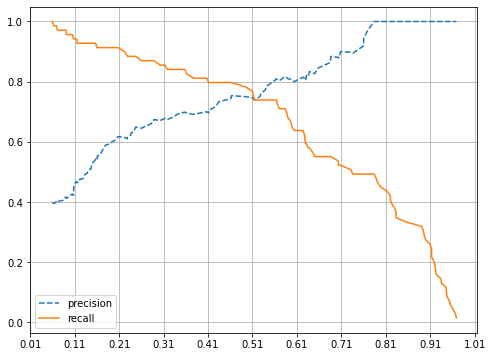

In [60]:
precision_recall_curve_plot(y_test, pred_proba_class1)

In [61]:
from sklearn.metrics import f1_score

In [62]:
f1 = f1_score(y_test, pred)
f1

0.7571428571428571

In [63]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print("오차행렬")
    print(confusion)
    print(f"정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}")

In [64]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
def get_eval_by_threshold(y_test, pred_proba_cl, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_cl)
        custom_predict = binarizer.transform(pred_proba_cl)
        print('임곗값 :', custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값 : 0.4
오차행렬
[[86 24]
 [13 56]]
정확도 : 0.7933, 정밀도 : 0.7000, 재현율 : 0.8116, F1 : 0.7517
임곗값 : 0.45
오차행렬
[[91 19]
 [14 55]]
정확도 : 0.8156, 정밀도 : 0.7432, 재현율 : 0.7971, F1 : 0.7692
임곗값 : 0.5
오차행렬
[[92 18]
 [16 53]]
정확도 : 0.8101, 정밀도 : 0.7465, 재현율 : 0.7681, F1 : 0.7571
임곗값 : 0.55
오차행렬
[[97 13]
 [18 51]]
정확도 : 0.8268, 정밀도 : 0.7969, 재현율 : 0.7391, F1 : 0.7669
임곗값 : 0.6
오차행렬
[[99 11]
 [25 44]]
정확도 : 0.7989, 정밀도 : 0.8000, 재현율 : 0.6377, F1 : 0.7097


In [65]:
from sklearn.metrics import roc_curve

In [67]:
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

In [68]:
thr_index = np.arange(1,thresholds.shape[0],5)
thr_index

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])

In [69]:
fprs[thr_index]

array([0.        , 0.04545455, 0.09090909, 0.10909091, 0.22727273,
       0.26363636, 0.46363636, 0.51818182, 0.72727273, 0.85454545,
       1.        ])

In [70]:
tprs[thr_index]

array([0.01449275, 0.55072464, 0.5942029 , 0.73913043, 0.8115942 ,
       0.86956522, 0.91304348, 0.92753623, 0.94202899, 0.97101449,
       1.        ])

In [71]:
def roc_curve_plot(y_test, pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    plt.plot(fprs, tprs, label='ROC')
    plt.show()

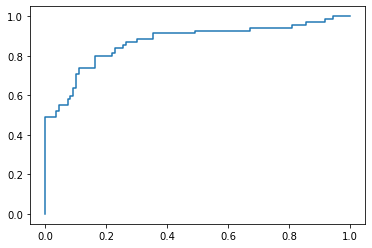

In [72]:
roc_curve_plot(y_test, pred_proba_class1)